In [1]:
%pylab inline
from matplotlib import colors as colors
import sim

Populating the interactive namespace from numpy and matplotlib


## 1. Define a Grid where the cells with obstacles are occupied
Example, a grid of 40x60 in a rectangular map of 2x3 m^2. The obstacles are random.

NOTE: for the workshop, you will not fill them randomly. It will be depending on the obstacles.

In [2]:
n, m = 20, 20  # number of rows and columns respectively.

In [3]:
# Create a matrix to represent the cells of the grid
grid_cells = np.zeros((20,20))

# Random obstacles for this example. 
np.random.seed(0)  # You can remove the random seed if you want to test different random grids.
grid = np.random.rand(20, 20)
threshold = 2
grid[grid > threshold] = 1
grid[grid<= threshold] = 0

#Cylinder12
grid[3,17] = 1
#Cylinder7
grid[7,13] = 1
#Cylinder11
grid[9,4] = 1
#Cylinder6
grid[11,14] = 1
#Cylinder5
grid[13,12] = 1
grid[14,12] = 1
grid[15,12] = 1
#Cylinder8
grid[16,9] = 1
#Cylinder10
grid[12,8] = 1
#Cylinder9
grid[13,5] = 1

#Cuboid1
grid[15,15] = 1
grid[15,16] = 1
grid[15,17] = 1
grid[15,18] = 1
grid[15,19] = 1
#Cuboid0
grid[12,11] = 1
grid[11,12] = 1
grid[10,13] = 1
#Cuboid3
grid[9,7] = 1
grid[9,8] = 1
grid[9,9] = 1
grid[9,10] = 1
#Cuboid4
grid[16,2] = 1
grid[16,3] = 1
grid[16,4] = 1
grid[16,5] = 1
grid[16,6] = 1
#Cuboid6
grid[5,3] = 1
grid[4,4] = 1
grid[4,5] = 1
grid[4,6] = 1
grid[3,7] = 1

grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

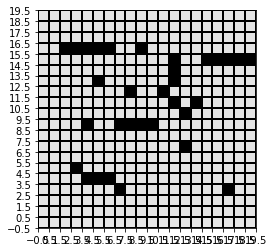

In [4]:
# Plot the grid
def draw_grid():
    fig, ax = plt.subplots()
    cmap = colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, m, 1));
    ax.set_yticks(np.arange(-0.5, n, 1));

draw_grid()

## 2. Create a graph to represent the grid
Every cell is a node, and adjecent vertices are connected by edges.

In [5]:
import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
print("Nodes:", G.nodes())

Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  368
Nodes: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 18), (3, 19), (4, 0), (4, 1), (4, 2), (4, 3), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 0), (5, 1), (5, 2), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5,

## Plot the graph



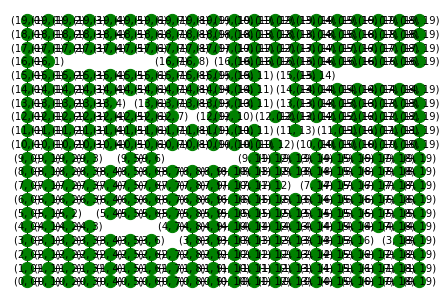

In [6]:
# Position of the nodes
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=150, node_color="g")

### Overlapping the grid and graph

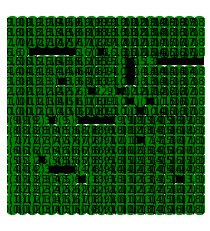

In [7]:
# Plot grid
draw_grid()

# Plot the graph
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = j, -i, where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=150, node_color="g")


# 3. Find a path between a pair of nodes

For example: Start at node (3.5) and move to node (3.0). Find a path using the Breadth-First-Search algorithm

In [13]:
start_node =  (4, 17)
end_node = (3,2)

# Run BFS to generate a tree
bfs_tree = nx.bfs_tree(G, source=start_node)


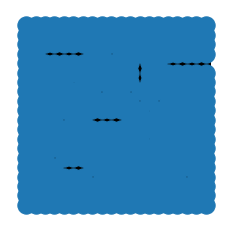

In [14]:
# plot the result of BSF
draw_grid()
nx.draw(bfs_tree, pos = pos)

In [15]:

# Pick the last element and iterate through its predecessors
path = [end_node]   # A path in a graph is a set of connected nodes
current = end_node

# iterate through its predecessors until finding source node
while current != start_node:
    # Predecesors of the current node        
    for pre in bfs_tree.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
        
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]

# Correct path
print(path)

[(4, 17), (4, 16), (3, 16), (2, 16), (2, 15), (2, 14), (2, 13), (2, 12), (2, 11), (2, 10), (2, 9), (2, 8), (2, 7), (2, 6), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2)]


## Plot the result

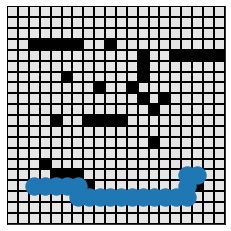

In [16]:
# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]

draw_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, nodes=path, edgelist=E, pos=pos,edge_color='r')


# Trajectory functions

In [91]:
def point_to_point_traj(x1, x2, v1, v2, delta_t):
  t = np.linspace(0, delta_t, 100)  
  a0 = x1
  a1 = v1
  a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
  a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

  polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
  derivative = a1 + 2*a2 * t + 3 * a3 * t**2
  return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()

        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

# Plotting

In [92]:
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

In [93]:
##### Requirements for the trajectory
wp = [0,0]
a0_list = list()
for p in path:
    tup = [p[1] - 10, p[0] - 10]
    list_tup = (p[1] - 10, p[0] - 10)
    wp = np.vstack((wp, tup))
    a0_list.append(list_tup)
wp = np.delete(wp, 0, 0) #delete 0,0
#wp = np.delete(wp, 1, 0) #delete initial pt

up = [0, 0.25]
down = [0, -0.25]
left = [-0.25, 0]
right = [0.25, 0]
stay = [0, 0]

vlist = np.vstack((down, down, left, left, left, left, left, 
                   left, left, left, 
                   down, down, down, left,
                   down, down, down, left, left, left, left,
                   down, down, down, down, 
                   left, left, left, left, 
                   down, down, down, stay))

up = tuple(up)
down = tuple(down)
left = tuple(left)
right = tuple(right)
stay = tuple(stay)

a1_list = [(down, down, left, left, left, left, left, 
                   left, left, left, 
                   down, down, down, left,
                   down, down, down, left, left, left, left,
                   down, down, down, down, 
                   left, left, left, left, 
                   down, down, down, stay)]

times = list()
t_ = 0
for p in path:
    times.append(t_)
    t_ = t_ + 10
print(times)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320]


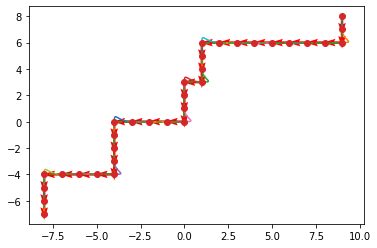

In [94]:
# Convert the initial conditions to a vector form
P = wp
V = vlist
T = times

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

# Plot the trajectory that passes trhough the desired waypoints
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)
plot_points()

# Robot code

In [95]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(clientID, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

In [58]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    print('Simulation time in milliseconds: ', sim.simxGetLastCmdTime(clientID))
    
    # Get Object position
    name = 'Omnirob'
    err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
    res, position = sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)        
    print('Omnirob is at [x,y,z]=', position)
    
    # Now close the connection to CoppeliaSim:
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    print('Disconnected')
else:
    print('Failed connecting to remote API server')

Connected
Simulation time in milliseconds:  93500
Omnirob is at [x,y,z]= [7.624996185302734, 8.54267406463623, 0.354498952627182]
Disconnected


In [97]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot

# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

desired_position = r.get_object_position('Sphere1')
print('Desired position: (%.2f, %.2f) '%(desired_position[0], desired_position[1]))

relative_position = r.get_object_relative_position('Sphere1')
print('Relative position: (%.2f, %.2f) '%(relative_position[0], relative_position[1]))


# Virtual disk - add a 1 unit disk with minimal density and collision off
disk = robot('Disc', client_id=r.client_id)


# Time duration
# tf = 5
# Time interval
time_steps = 10
###
# These arrays contain the 3rd degree polynomial coefficients at each step,
# based on the spline trajectory calculated from the given "trajectories.ipynb"
# from class / GitHub repository.
#
# They are stored as tuples, where the first element is the coefficient for the trajectory in the X direction,
# and the second element is the coefficient for the trajectory in the Y direction.
###
a0 = np.array(a0_list)
a1 = np.array(vlist)

waypoints = len(a0_list)

for i in range(waypoints):
    for t in range(time_steps):
        x_traj = a0[i][0] #+ (a1[i][0] * t) 
        y_traj = a0[i][1] #+ (a1[i][1] * t) 
        x_vel = a1[i][0]
        y_vel = a1[i][1]

        disk.set_position([x_traj, y_traj, -1])


        # Sensing
        robot_position = r.get_position()


        # Trajectory tracker
        u = 16 * ((x_traj, y_traj, 0) - robot_position) + [x_vel, y_vel, 0]

        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])

        time.sleep(0.02)


r.close_connection() 

Robot connected
Robot position: (7.62, 8.54) 
Desired position: (3.22, -2.60) 
Relative position: (-4.41, -11.14) 
Robot connected
Connection closed
